# 1] Import Dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2] Load Dataset

In [2]:
data = pd.read_csv('wine.csv')
print('We have {} rows and {} columns'.format(data.shape[0], data.shape[1]))
data.head()

We have 178 rows and 14 columns


Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# 3] Exploratory Data Analysis

In [3]:
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).T

count        mean         std     min       25%      50%  \
Type             178.0    1.938202    0.775035    1.00    1.0000    2.000   
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   

                      75%       90%        95%        99%      max  
Type               3.0000     3.000     3.0000     3.0000     3.00  
Alcohol           13.6775    14.100    14.2215    14.4728    14.83  
Malic              3.0825     3.983     4.4555     5.5422     5.80  
Ash                2.5575     2.700     2.7415     2.9890     3.23  
Alcalinity        21.5000    24.000    25.0000    28.5000    30.00  
Magnesium        107.0000   118.000   124.3000   141.7600   162.00  
Phenols            2.8000     3.044     3.2745     3.5959     3.88  
Flavanoids         2.8750     3.233     3.4975     3.7914     5.08  
Nonflavanoids      0.4375     0.530     0.6000     0.6300     0.66  
Proanthocyanins    1.9500     2.305     2.7090     3.0336     3.58  
Color              6.2000     8.530     9.5980    11.0185    13.00  
Hue                1.1200     1.233     1.2845     1.4269     1.71  
Dilution           3.1700     3.456     3.5800     3.8430     4.00  
Proline          985.0000  1261.500  1297.2500  1522.3600  1680.00

In [7]:
data["Type"].unique()

array([1, 2, 3], dtype=int64)

In [8]:
data.value_counts("Type")

Type
2    71
1    59
3    48
dtype: int64

In [9]:
print("Skewness  \n ",data.skew())
print("\n Kurtosis  \n ", data.kurt())

Skewness  
  Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

 Kurtosis  
  Type              -1.322787
Alcohol           -0.852500
Malic              0.299207
Ash                1.143978
Alcalinity         0.487942
Magnesium          2.104991
Phenols           -0.835627
Flavanoids        -0.880382
Nonflavanoids     -0.637191
Proanthocyanins    0.554649
Color              0.381522
Hue               -0.344096
Dilution          -1.086435
Proline           -0.248403
dtype: float64


# 4] Visualization

In [10]:
cm = sns.light_palette("green", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

# 5] Model Building

In [11]:
X = data.iloc[:,1:]
y = data['Type']

In [12]:
print('No.of Components:',X.shape[1])
X.head()

No.of Components: 13


Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [13]:
from sklearn.preprocessing import StandardScaler

#Scaling features columns
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA

# initializing PCA transformations
pca = PCA(n_components =3)

# PCA transformations on feature data
X_trf = pca.fit_transform(X_scaled)

# principle components and there coordinates
df_PCA = pd.DataFrame(X_trf,
                     columns=['PC1','PC2', 'PC3']).head()
df_PCA 

PC1       PC2       PC3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

In [15]:
print(pca.components_.shape)
pca.components_ #eigen_vector
# 3 eigen values in 13 components of that space
# 3 eigen values works in 13 axis

(3, 13)


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [16]:
pca.explained_variance_

#eigen values/lambda values for n_componenets=None/all
#each value explaines % variance of original data

array([4.73243698, 2.51108093, 1.45424187])

In [17]:
fig = px.scatter_3d(x= X_trf[:,0],
                 y = X_trf[:,1],
                 z= X_trf[:,2],
                 color=y)

fig.update_layout(margin = dict(l=20,r =20, t = 20, b= 20))
fig.show()

In [18]:
# variance in feature data explained by each principle component
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Hierarchical Clustering

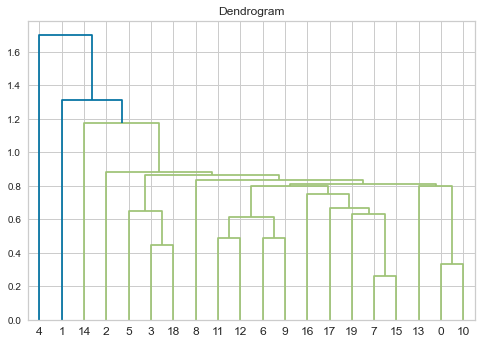

In [20]:
# tree arrangement of clusters for first 60 observations 
dendrogram = sch.dendrogram(sch.linkage(X_trf[:20],
                                        method='single'))
plt.title('Dendrogram')
plt.show()

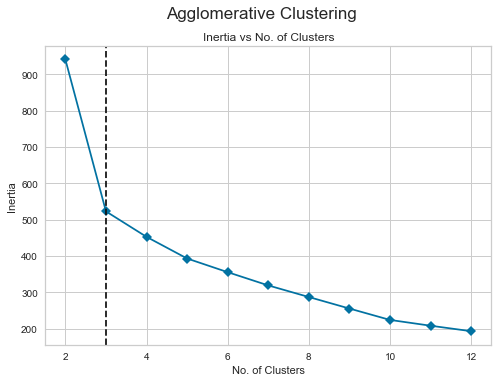

In [29]:
model = AgglomerativeClustering()
visInertia = KElbowVisualizer(model,k=(2,13),timings=False)
visInertia.fit(X_trf)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('Inertia vs No. of Clusters')
plt.show()


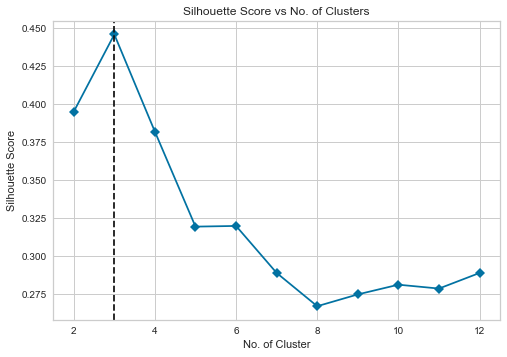

In [28]:
visSilh = KElbowVisualizer(model,k=(2,13),
                           metric='silhouette',
                           timings=False)
plt.title('Silhouette Score vs No. of Clusters')
plt.xlabel('No. of Cluster')
plt.ylabel('Silhouette Score')
visSilh.fit(X_trf)
plt.show()

In [30]:
# final Agglomerative (hierarchical clustering) with 
# No. of clusters = 3

final_hc = AgglomerativeClustering(n_clusters=visInertia.elbow_value_,
                                   affinity='euclidean',
                                   linkage='single')
final_hc.fit(X_trf)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [31]:
paMatrix = pd.crosstab(final_hc.labels_,
                       y.values.ravel())

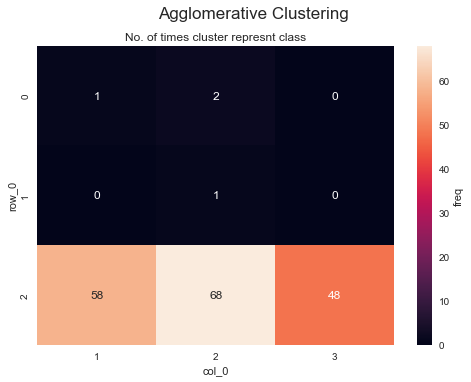

In [32]:
# presence/absense matrix
sns.heatmap(paMatrix,
            cbar_kws={'label':'freq'},
            annot=True)
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of times cluster represnt class')
plt.show()

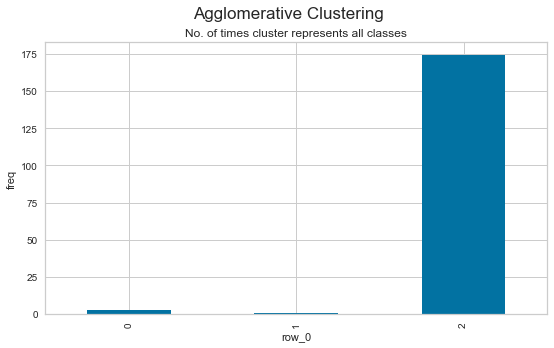

In [33]:
# No. of classes represented by each cluster 
plt.figure(figsize=(9,5))
paMatrix.sum(axis=1).plot(kind='bar')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of times cluster represents all classes')
plt.ylabel('freq')
plt.show()

In [34]:
data['clusterID'] = final_hc.labels_
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clusterID  
0           0.28             2.29   5.64  1.04      3.92     1065          2  
1           0.26             1.28   4.38  1.05      3.40     1050          2  
2           0.30             2.81   5.68  1.03      3.17     1185          2  
3           0.24             2.18   7.80  0.86      3.45     1480          2  
4           0.39             1.82   4.32  1.04      2.93      735          2

In [35]:
score = silhouette_score(X_trf,
                         final_hc.labels_)*100
score

21.66287164412577

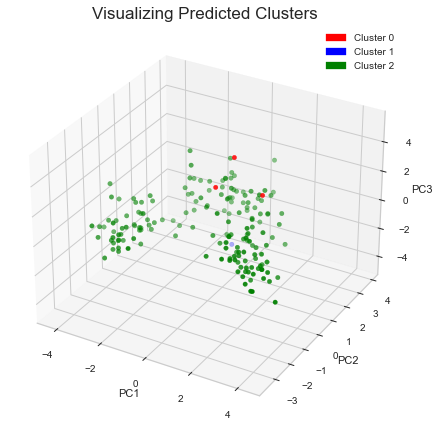

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches 

point_agg = final_hc.labels_.copy().astype('object') 
point_agg[point_agg == 0] = 'red'
point_agg[point_agg == 1] = 'blue'
point_agg[point_agg == 2] = 'green'

# Principle Component Coordinates
pcX = X_trf[:,0]
pcY = X_trf[:,1]
pcZ = X_trf[:,2]
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter3D(pcX,pcY,pcZ,c=point_agg)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizing Predicted Clusters',fontsize=17)
plt.legend(handles=[mpatches.Patch(color='red',label='Cluster 0'),
                    mpatches.Patch(color='blue',label='Cluster 1'),
                    mpatches.Patch(color='green',label='Cluster 2')])
plt.show()

## KMeans Clustering

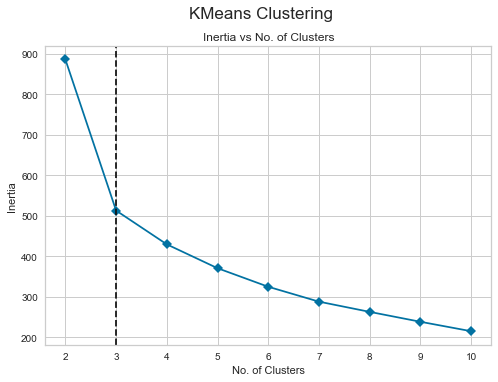

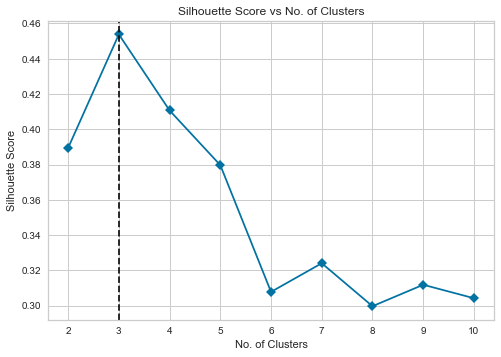

In [39]:
model = KMeans(random_state=42)
visInertia = KElbowVisualizer(model,k=(2,11),timings=False)
visInertia.fit(X_trf)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('Inertia vs No. of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,11),
                           metric='silhouette',
                           timings=False)
plt.title('Silhouette Score vs No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
visSilh.fit(X_trf)
plt.show()

In [40]:
# final KMeans (non-hierarchical clustering) with 
#No. of clusters = 3
final_kmeans = KMeans(n_clusters=visInertia.elbow_value_,
                      random_state=42)
final_kmeans.fit(X_trf)

KMeans(n_clusters=3, random_state=42)

In [42]:
paMatrix_KMeans = pd.crosstab(final_kmeans.labels_,
                              y.values.ravel())

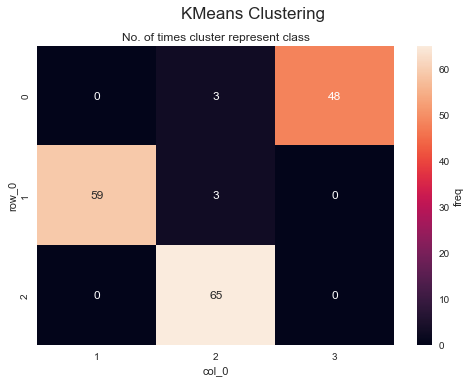

In [43]:
# presence/absence matrix 
sns.heatmap(paMatrix_KMeans,
            cbar_kws={'label':'freq'},
            annot=True)
plt.title('No. of times cluster represent class')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.show()

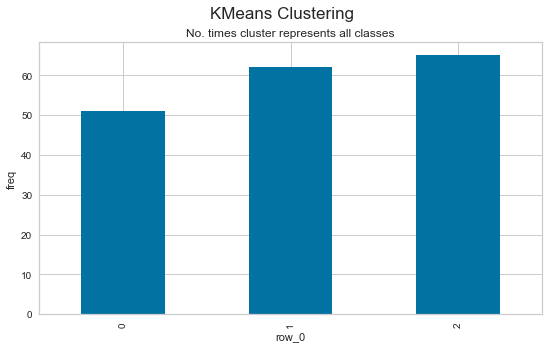

In [44]:
# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix_KMeans.sum(axis=1).plot(kind='bar')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('No. times cluster represents all classes')
plt.ylabel('freq')
plt.show()

In [45]:
data['clusterID'] = final_kmeans.labels_
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clusterID  
0           0.28             2.29   5.64  1.04      3.92     1065          1  
1           0.26             1.28   4.38  1.05      3.40     1050          1  
2           0.30             2.81   5.68  1.03      3.17     1185          1  
3           0.24             2.18   7.80  0.86      3.45     1480          1  
4           0.39             1.82   4.32  1.04      2.93      735          1

In [47]:
score = silhouette_score(X_trf,
                         final_kmeans.labels_)*100
score

45.37999848257617

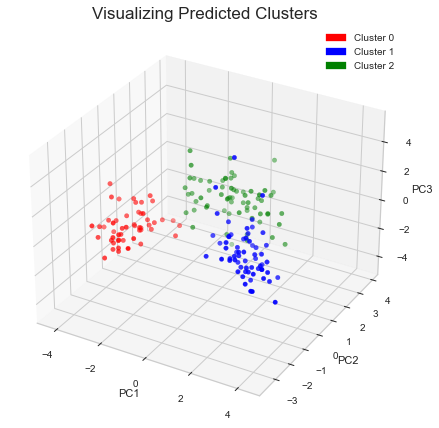

In [48]:
point_kmeans = final_kmeans.labels_.copy().astype('object') 
point_kmeans[point_kmeans == 0] = 'red'
point_kmeans[point_kmeans == 1] = 'blue'
point_kmeans[point_kmeans == 2] = 'green'
# Principle Component Coordinates
pcX = X_trf[:,0]
pcY = X_trf[:,1]
pcZ = X_trf[:,2]
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter3D(pcX,pcY,pcZ,c=point_kmeans)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizing Predicted Clusters',fontsize=17)
plt.legend(handles=[mpatches.Patch(color='red',label='Cluster 0'),
                    mpatches.Patch(color='blue',label='Cluster 1'),
                    mpatches.Patch(color='green',label='Cluster 2')])
plt.show()

- ### KMeans Clustering with 3 clusters and silhouette Score of +45.38%%